<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="../figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb) | [Contents](Index.ipynb) | [Introducing Pandas Objects](03.01-Introducing-Pandas-Objects.ipynb) >

# Data Manipulation with Pandas

In the previous chapter, we dove into detail on NumPy and its ``ndarray`` object, which provides efficient storage and manipulation of dense typed arrays in Python.
Here we'll build on this knowledge by looking in detail at the data structures provided by the Pandas library.
**Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a ``DataFrame``.**
**``DataFrame``s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.**
As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

As we saw, NumPy's ``ndarray`` data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks.
While it serves this purpose very well, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (e.g., groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us.
**Pandas, and in particular its ``Series`` and ``DataFrame`` objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.**

In this chapter, we will focus on the mechanics of using ``Series``, ``DataFrame``, and related structures effectively.
We will use examples drawn from real datasets where appropriate, but these examples are not necessarily the focus.

Data Munging 이란?

- Data Munging (또는 Data Wrangling)은

- 엉망인(raw) 데이터를 깨끗하고 분석 가능한 형태로 가공(clean) 하는 과정.

- 쉽게 말하면, "데이터를 다듬고 요리하는 작업"

mung의 의미

- Mung라는 단어는 사실 **컴퓨터 해커 슬랭(hacker slang)**.

- 원래 의미는: 데이터를 부수거나, 망가뜨리거나, 변형시키다

- Data Munging에서는? 거칠고 지저분한 원본 데이터를 깔끔하게 가공한다


data munging의 구체적 작업 예:

- 결측치 처리: NaN을 0으로 채우기, 또는 삭제하기
- 이상치 처리: 극단적으로 튀는 값 제거
- 타입 변환	문자열: 숫자형, 날짜형 변환
- 포맷 정리	"20250427": "2025-04-27"로 변환
- 컬럼 생성/변형: 여러 열을 합치거나 나누기
- 데이터 필터링	필요한 행만 골라내기

## Installing and Using Pandas

Installation of Pandas on your system requires NumPy to be installed, and if building the library from source, requires the appropriate tools to compile the C and Cython sources on which Pandas is built.
Details on this installation can be found in the [Pandas documentation](http://pandas.pydata.org/).
If you followed the advice outlined in the [Preface](00.00-Preface.ipynb) and used the Anaconda stack, you already have Pandas installed.

Once Pandas is installed, you can import it and check the version:

In [10]:
import pandas
pandas.__version__

'2.3.3'

Just as we generally import NumPy under the alias ``np``, we will import Pandas under the alias ``pd``:

In [11]:
import pandas as pd

This import convention will be used throughout the remainder of this book.

## Reminder about Built-In Documentation

As you read through this chapter, don't forget that IPython gives you the ability to quickly explore the contents of a package (by using the tab-completion feature) as well as the documentation of various functions (using the ``?`` character). (Refer back to [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb) if you need a refresher on this.)

For example, to display all the contents of the pandas namespace, you can type

```ipython
In [3]: pd.<TAB>
```

And to display Pandas's built-in documentation, you can use this:

```ipython
In [4]: pd?
```

More detailed documentation, along with tutorials and other resources, can be found at http://pandas.pydata.org/.

<!--NAVIGATION-->
< [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb) | [Contents](Index.ipynb) | [Introducing Pandas Objects](03.01-Introducing-Pandas-Objects.ipynb) >

파일을 활용한 판다스 데이터 전처리 실습 과제
1. 🛠️ 실습 환경 준비: 파일 읽기 및 데이터 이해
과제 1-1: 파일 읽기
첨부된 births.csv 파일을 읽어와 **df**라는 이름의 데이터프레임으로 저장하세요.

Python

import pandas as pd
import numpy as np

# 'births.csv' 파일을 읽어와 df에 저장하세요.
df = pd.read_csv('births.csv')
과제 1-2: 기본 정보 확인
데이터프레임의 처음 5개 행을 출력하여 데이터를 확인하세요.

info() 함수를 사용하여 각 열의 데이터 타입과 결측치 여부를 확인하세요.

describe() 함수를 사용하여 수치형 데이터의 분포(평균, 표준편차 등)를 확인하세요.



In [14]:
import pandas as pd
import numpy as np

# 과제 1-1: CSV 파일 읽기
df = pd.read_csv('../data/births.csv')   # 파일 경로가 같은 폴더에 있다고 가정

# 과제 1-2: 기본 정보 확인

# ① 처음 5개 행 출력
print("===== head(5) =====")
print(df.head())

# ② info() — 데이터 타입 & 결측치 여부
print("\n===== info() =====")
df.info()

# ③ describe() — 수치형 데이터 통계 요약
print("\n===== describe() =====")
print(df.describe())


===== head(5) =====
   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

===== info() =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB

===== describe() =====
               year         month           day         births
count  15547.000000  15547.000000  15067.000000   15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561
std        6.728340      3.449632     15.284034   28552.465810
min     1969.000000      1.000000      1.00

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df[:5]

,year,month,day,gender,births
0,1969,1,1,F,4046.0
1,1969,1,1,M,4440.0
2,1969,1,2,F,4454.0
3,1969,1,2,M,4548.0
4,1969,1,3,F,4548.0


2. 📝 데이터 정제 및 결측치 처리 (Data Cleaning & Missing Data)
과제 2-1: 결측치 확인 및 처리
각 열별 결측치의 개수를 확인하세요.

day 열에 결측치가 존재할 수 있습니다. day 열의 결측치는 **해당 열의 중앙값(median)**으로 대체하여 채우세요. (원본 df에 반영)

day 열의 소수점을 제거하고 정수형으로 타입을 변환하세요.

과제 2-2: 이상값 및 불필요 데이터 처리
day 열에 99와 같은 비정상적인 값(이상값)이 포함되어 있습니다. 이는 결측치와 유사한 역할을 하므로, 해당 값을 갖는 행을 찾아 삭제하세요.

births 열에서 **극단적으로 큰 값(예: 100,000 이상)**을 갖는 행이 있다면, 해당 값을 births 열의 99.9 백분위수(quantile) 값으로 변경하세요. (이상값 대체)

In [15]:
# ============================
# 과제 2-1: 결측치 확인 및 처리
# ============================

# 1) 각 열별 결측치 개수 확인
print("=== 결측치 개수 ===")
print(df.isna().sum())

# 2) day 열의 결측치를 중앙값(median)으로 대체
median_day = df['day'].median()
print("\n- day 열 중앙값(median):", median_day)

df['day'].fillna(median_day, inplace=True)# 결측치를 중앙값으로 채운다

# 3) day 열을 정수형으로 변환 (소수점 제거)
#    - 반올림 후 정수형으로 변환
df['day'] = df['day'].round().astype(int)

print("\n=== day 열 요약 (정제 후) ===")
print(df['day'].describe())


# ==================================
# 과제 2-2: 이상값 및 불필요 데이터 처리
# ==================================

# 4) day 열에서 99와 같은 비정상 값(이상값) 삭제
before_rows = len(df)
df = df[df['day'] <= 31].copy()   # day != 99인 행만 남기고 복사
after_rows = len(df)
print("\n삭제된 day > 31 행 수:", before_rows - after_rows)

# 5) births 열에서 극단적으로 큰 값(>= 100,000)을 99.9 분위수로 대체
#    (outlier capping / winsorizing 비슷한 개념)
# 극단적으로 큰 값 또는 작은 값을 통계적으로 정해진 범위 안으로 ‘깎아내는(capping)’ 방식

#Winsorizing (윈저화) - Outlier Capping과 거의 동일
## 이상값을 "두꺼운 꼬리를 잘라내고, 대신 분위수 값으로 대체" 한다는 의미.

# 5-1) 99.9 백분위수 계산
q_999 = df['births'].quantile(0.999) # births 값 중에서 가장 큰 값들 상위 0.1%를 가르는 기준값을 추출하는 것.

print("\n- births 열 99.9 분위수(quantile 0.999):", q_999)

# 5-2) 이상값 마스크 생성
outlier_mask = df['births'] >= 100000

print("births >= 100,000 인 행 수:", outlier_mask.sum())

# 5-3) 해당 위치를 99.9 분위수 값으로 대체
df.loc[outlier_mask, 'births'] = q_999

print("\n=== births 열 요약 (이상값 처리 후) ===")
print(df['births'].describe())


=== 결측치 개수 ===
year        0
month       0
day       480
gender      0
births      0
dtype: int64

- day 열 중앙값(median): 16.0

=== day 열 요약 (정제 후) ===
count    15547.000000
mean        17.715251
std         15.049343
min          1.000000
25%          9.000000
50%         16.000000
75%         24.000000
max         99.000000
Name: day, dtype: float64

삭제된 day > 31 행 수: 350

- births 열 99.9 분위수(quantile 0.999): 187966.59200000105
births >= 100,000 인 행 수: 480

=== births 열 요약 (이상값 처리 후) ===
count     15197.000000
mean      10575.146553
std       32045.025017
min           1.000000
25%        4388.000000
50%        4837.000000
75%        5300.000000
max      187966.592000
Name: births, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_15712\165698282.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['day'].fillna(median_day, inplace=True)# 결측치를 중앙값으로 채운다
C:\Users\user\AppData\Local\Temp\ipykernel_15712\165698282.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '187966.59200000105' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outlier_mask, 'births'] = q_999


3. ✨ 특성 변환 및 파생 변수 생성 (Feature Engineering)

과제 3-1: 날짜/시간 변수 통합 및 생성
year, month, day 세 열을 조합하여 새로운 Date 열을 만드세요. 이 열은 날짜/시간(datetime) 타입이어야 합니다.

힌트: pd.to_datetime(df[['year', 'month', 'day']])을 사용해 보세요.

새로 생성된 Date 열을 데이터프레임의 인덱스로 설정하세요.

Date 인덱스에서 요일(Day of Week) 정보를 추출하여 **DayOfWeek**라는 새로운 열을 생성하세요.

과제 3-2: 범주형 변수 처리
gender 열에 대해 원-핫 인코딩을 수행하여 새로운 데이터프레임 df_encoded를 만드세요. (원본 gender 열은 삭제하고 새로운 더미 변수를 추가)

In [18]:
# ============================
# 과제 3-1: Date 열 생성 및 파생 변수
# ============================
#과제 3-1: 날짜/시간 변수 통합 + 인덱스 설정 + 요일 파생 변수
# 1) year, month, day 열을 조합하여 datetime 형식의 Date 열 생성
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])

# 2) Date 열을 데이터프레임의 인덱스로 설정
df.set_index('Date', inplace=True)

# 3) 요일(Day of Week) 정보 추출
#    Monday=0 ~ Sunday=6   → 필요 시 이름으로 바꿀 수 있음
df['DayOfWeek'] = df.index.dayofweek

print("=== Date 인덱스 및 DayOfWeek 생성 결과 확인 ===")
print(df.head())


ValueError: cannot assemble the datetimes: day is out of range for month, at position 59. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [20]:
# ============================
# 잘못된 날짜 처리 + Date 생성
# ============================

# 1) 우선 year, month, day로 datetime을 만들되,
#    잘못된 날짜는 errors='coerce'로 NaT로 처리
temp_dates = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

# 2) 어떤 값들이 잘못되었는지 확인 (선택 사항, 디버깅용)
print("=== 잘못된 날짜(year, month, day) 예시 ===")
print(df[temp_dates.isna()][['year', 'month', 'day']].head())

# 3) Date 열에 임시 결과를 넣고, 잘못된 날짜(NaT) 행은 삭제
df['Date'] = temp_dates

before_rows = len(df)
df = df.dropna(subset=['Date']).copy()
after_rows = len(df)

print(f"\n삭제된 잘못된 날짜 행 수: {before_rows - after_rows}")

# 4) Date를 인덱스로 설정
df.set_index('Date', inplace=True)

# 5) 요일 정보(0=월요일 ~ 6=일요일) 파생 변수 추가
df['DayOfWeek'] = df.index.dayofweek

print("\n=== 처리 후 데이터 확인 ===")
print(df.head())


=== 잘못된 날짜(year, month, day) 예시 ===
     year  month  day
120  1969      2   29
121  1969      2   29
122  1969      2   30
123  1969      2   30
124  1969      2   31

삭제된 잘못된 날짜 행 수: 107

=== 처리 후 데이터 확인 ===
            year  month  day gender  births  DayOfWeek
Date                                                  
1969-01-01  1969      1    1      F  4046.0          2
1969-01-01  1969      1    1      M  4440.0          2
1969-01-02  1969      1    2      F  4454.0          3
1969-01-02  1969      1    2      M  4548.0          3
1969-01-03  1969      1    3      F  4548.0          4


In [21]:
# ============================
# 과제 3-2: gender 원-핫 인코딩
# ============================
#과제 3-2: 범주형 변수 처리 (One-Hot Encoding)
# gender 열을 원-핫 인코딩하여 새로운 데이터프레임 생성
df_encoded = pd.get_dummies(df, columns=['gender'], drop_first=False)

print("=== 원-핫 인코딩 완료: gender → 더미 변수 ===")
print(df_encoded.head())


=== 원-핫 인코딩 완료: gender → 더미 변수 ===
            year  month  day  births  DayOfWeek  gender_F  gender_M
Date                                                               
1969-01-01  1969      1    1  4046.0          2      True     False
1969-01-01  1969      1    1  4440.0          2     False      True
1969-01-02  1969      1    2  4454.0          3      True     False
1969-01-02  1969      1    2  4548.0          3     False      True
1969-01-03  1969      1    3  4548.0          4      True     False


4. 🔍 데이터 인덱싱 및 선택 (Indexing & Selection)
과제 4-1: 날짜 인덱스 활용
2000년 1월 1일부터 2000년 12월 31일까지의 데이터만 인덱스를 활용하여 선택하고, 그 결과를 출력하세요.

1월에 태어난 데이터만 인덱스를 활용하여 선택하고, 그 중 births의 최댓값을 구하세요.

과제 4-2: 조건 기반 선택 및 집계
**'F'(여아)**로 기록된 데이터 중 출생아 수(births)가 4000 미만인 행의 개수를 구하세요.

groupby() 함수를 사용하여 **year**별 **births**의 **총합(Sum)**을 계산하고, 그 결과를 막대 그래프로 시각화해 보세요.

💡 최종 점검 및 분석
모든 과제를 완료한 후, 최종적으로 처리된 데이터프레임 df 또는 **df_encoded**의 head()와 info()를 출력하여 데이터가 분석에 적합한 형태로 잘 변환되었는지 확인해 보세요.

=== 2000년 한 해 데이터 (2000-01-01 ~ 2000-12-31) ===
            year  month  day gender      births  DayOfWeek
Date                                                      
2000-01-16  2000      1   16      F  187966.592          6
2000-01-16  2000      1   16      M  187966.592          6
2000-02-16  2000      2   16      F  187966.592          2
2000-02-16  2000      2   16      M  187966.592          2
2000-03-16  2000      3   16      F  187966.592          3
행 개수: 24

=== 1월 데이터 중 births 최댓값 ===
1월 births 최댓값: 187966.59200000105

=== 'F' & births < 4000 인 행 개수 ===
개수: 719

=== year별 births 합계 ===
year
1969    3598578.0
1970    3734606.0
1971    3563074.0
1972    3265863.0
1973    3145670.0
Name: births, dtype: float64


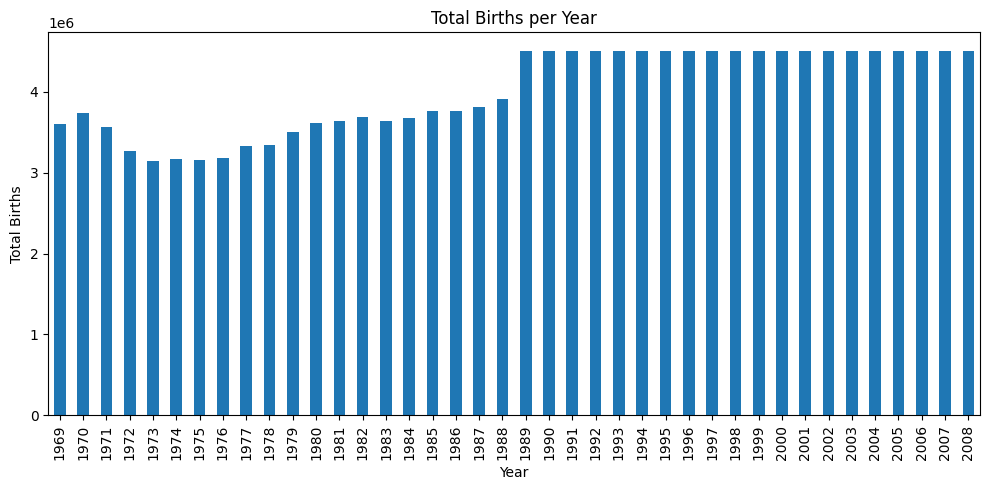


=== 최종 df.head() ===
            year  month  day gender  births  DayOfWeek
Date                                                  
1969-01-01  1969      1    1      F  4046.0          2
1969-01-01  1969      1    1      M  4440.0          2
1969-01-02  1969      1    2      F  4454.0          3
1969-01-02  1969      1    2      M  4548.0          3
1969-01-03  1969      1    3      F  4548.0          4

=== 최종 df.info() ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15090 entries, 1969-01-01 to 2008-12-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       15090 non-null  int64  
 1   month      15090 non-null  int64  
 2   day        15090 non-null  int64  
 3   gender     15090 non-null  object 
 4   births     15090 non-null  float64
 5   DayOfWeek  15090 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 1.3+ MB
None

=== 최종 df_encoded.head() ===
            year  m

In [22]:
import matplotlib.pyplot as plt

# =======================================
# 과제 4-1: 날짜 인덱스 활용
# =======================================

# 1) 2000년 1월 1일 ~ 2000년 12월 31일 데이터 선택
df_2000 = df.loc['2000-01-01':'2000-12-31']
print("=== 2000년 한 해 데이터 (2000-01-01 ~ 2000-12-31) ===")
print(df_2000.head())
print("행 개수:", len(df_2000))

# 2) 1월에 태어난 데이터만 선택 (모든 연도에서 1월)
df_january = df[df.index.month == 1]

# 1월 데이터 중 births의 최댓값
max_births_january = df_january['births'].max()
print("\n=== 1월 데이터 중 births 최댓값 ===")
print("1월 births 최댓값:", max_births_january)


# =======================================
# 과제 4-2: 조건 기반 선택 및 집계
# =======================================

# 3) 'F'(여아)이고 births < 4000 인 행 개수
#    (df에는 아직 gender 열이 있다고 가정)
condition = (df['gender'] == 'F') & (df['births'] < 4000)
f_under_4000_count = df[condition].shape[0]

print("\n=== 'F' & births < 4000 인 행 개수 ===")
print("개수:", f_under_4000_count)

# 4) year별 births 합계 계산
yearly_births_sum = df.groupby('year')['births'].sum()
print("\n=== year별 births 합계 ===")
print(yearly_births_sum.head())

# 5) year별 births 합계를 막대 그래프로 시각화
plt.figure(figsize=(10, 5))
yearly_births_sum.plot(kind='bar')
plt.title('Total Births per Year')
plt.xlabel('Year')
plt.ylabel('Total Births')
plt.tight_layout()
plt.show()


# =======================================
# 💡 최종 점검: df와 df_encoded 형태 확인
# =======================================

print("\n=== 최종 df.head() ===")
print(df.head())

print("\n=== 최종 df.info() ===")
print(df.info())

print("\n=== 최종 df_encoded.head() ===")
print(df_encoded.head())

print("\n=== 최종 df_encoded.info() ===")
print(df_encoded.info())


### Pandas 전처리에서 꼭 익혀야 하는 핵심 함수

✅ ① 데이터 구조 파악 & 정보 확인

전체 구조 확인	df.info()

기초 통계	df.describe()

일부 행만 보기	df.head(), df.tail()

차원 확인	df.shape, df.ndim

열 목록 보기	df.columns, df.dtypes

✅ ② 결측치 처리 (Missing Values)

결측치 개수	df.isna(), df.isna().sum()

결측치 채우기	df.fillna(value)

결측치 삭제	df.dropna()

특정 조건으로 채우기	df['col'].replace(old, new)

✅ ③ 데이터 선택 & 인덱싱

라벨 기반 선택	df.loc[]

숫자 기반 선택	df.iloc[]

조건 필터링	df[df['col'] > 100]

여러 조건	df[(cond1) & (cond2)]

열 선택	df['col'], df[['col1', 'col2']]

✅ ④ 열/행 추가·삭제·정렬

열 추가	df['new'] = ...

열 삭제	df.drop(columns=['col'])

행 삭제	df.drop(index=...)

정렬	df.sort_values(by='col', ascending=True)

인덱스 재정렬	df.reset_index(drop=True)

✅ ⑤ 그룹화 & 집계

그룹별 계산	df.groupby('col')['target'].sum()

여러 통계 한번에	df.groupby('col').agg({'x':'mean','y':'max'})

피벗 테이블	df.pivot_table(index=..., values=..., aggfunc='sum')

✅ ⑥ 타입 변환 & 문자열 처리

타입 변환	df['col'].astype(int/float/str)

문자열 메소드	df['col'].str.upper() / .contains() / .replace()

날짜 변환	pd.to_datetime(df['date'])

날짜에서 성분 추출	df['date'].dt.year / .dt.month / .dt.dayofweek

✅ ⑦ 중복 & 이상값

중복 여부	df.duplicated()

중복 제거	df.drop_duplicates()

이상값 처리	clip(), quantile() (백분위 기반 절삭)

✅ ⑧ 결합·병합 (데이터 통합)

행 방향 결합	pd.concat([df1, df2])

열 방향 결합	pd.concat([df1, df2], axis=1)

SQL-style 병합	pd.merge(df1, df2, on='key', how='inner/outer/left/right')

인덱스 맞춰 결합	.join()

🔥 전처리 실무에서 특히 자주 묶어서 쓰는 조합

결측치 정리	isna() + fillna() + astype()

이상치 처리	quantile() + clip()

문자열 카테고리 정리	str.lower() + str.replace() + get_dummies()

날짜 분석	to_datetime() + dt.year/month/dayofweek + resample()

요약 통계	groupby() + agg()

ML 학습용 데이터 변환	drop() + get_dummies() + astype() + reset_index()

In [ ]:
df = pd.read_csv('data.csv')

df.info()
df.drop_duplicates(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['sex'] = df['sex'].str.upper().str.strip()
df['age'].fillna(df['age'].median(), inplace=True)
df = pd.get_dummies(df, columns=['sex'])
df = df[df['income'] < df['income'].quantile(0.999)]
df['income'] = df['income'].clip(lower=0)
group = df.groupby('year')['income'].mean()
df.reset_index(drop=True, inplace=True)
